In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
df = pd.read_csv("/content/(1990 - 2020 max and min temp only) (1).csv")

df.head()

,Station Index,Year,Days,Jan Max,Jan Min,Feb Max,Feb Min,Mar Max,Mar Min,April Max,...,Aug Max,Aug Min,Sep Max,Sep Min,Oct Max,Oct Min,Nov Max,Nov Min,Dec Max,Dec Min
0,Puri,1990,1,27.5,20.1,29.4,22.5,30.0,26.5,30.9,...,33.7,28.5,33.2,28.4,30.8,26.0,31.1,23.1,29.6,21.2
1,Puri,1990,2,27.0,17.8,29.6,25.4,30.2,24.0,31.9,...,32.2,25.0,32.5,28.5,31.4,25.5,24.6,22.9,29.2,21.4
2,Puri,1990,3,26.7,17.3,30.2,25.4,26.2,20.0,31.4,...,33.7,29.2,32.0,26.3,29.6,26.0,26.6,22.7,29.6,20.4
3,Puri,1990,4,26.8,16.2,29.7,23.4,26.0,19.6,30.5,...,34.0,29.0,31.6,27.4,31.5,26.4,29.0,24.4,29.4,19.8
4,Puri,1990,5,27.2,15.0,30.0,25.3,29.5,21.5,30.4,...,33.0,29.0,31.8,28.4,30.2,25.5,31.0,25.6,28.9,20.0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14415 entries, 0 to 14414
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Station Index  14415 non-null  object 
 1   Year           14415 non-null  int64  
 2   Days           14415 non-null  int64  
 3   Jan Max        14415 non-null  float64
 4   Jan Min        14415 non-null  float64
 5   Feb Max        14415 non-null  float64
 6   Feb Min        14415 non-null  float64
 7   Mar Max        14415 non-null  float64
 8   Mar Min        14415 non-null  float64
 9   April Max      14415 non-null  float64
 10  April Min      14415 non-null  float64
 11  May Max        14415 non-null  float64
 12  May Min        14415 non-null  float64
 13  Jun Max        14415 non-null  float64
 14  Jun Min        14415 non-null  float64
 15  July Max       14415 non-null  float64
 16  July Min       14415 non-null  float64
 17  Aug Max        14415 non-null  float64
 18  Aug Mi

In [ ]:
df.shape

(14415, 27)

In [ ]:
df.describe()


,Year,Days,Jan Max,Jan Min,Feb Max,Feb Min,Mar Max,Mar Min,April Max,April Min,...,Aug Max,Aug Min,Sep Max,Sep Min,Oct Max,Oct Min,Nov Max,Nov Min,Dec Max,Dec Min
count,14415.000000,14415.000000,14415.000000,14415.000000,14415.000000,14415.000000,14415.000000,14415.000000,14415.000000,14415.000000,...,14415.000000,14415.000000,14415.000000,14415.000000,14415.000000,14415.000000,14415.000000,14415.000000,14415.000000,14415.000000
mean,2005.000000,16.000000,42.949483,32.201138,50.295248,40.822629,48.483580,38.709455,51.888505,42.958529,...,46.447825,41.718467,49.515512,44.517787,46.962470,40.324523,48.383718,40.013867,44.402220,34.299126
std,8.944582,8.944582,29.457437,35.245357,31.133992,37.439345,27.044431,32.726400,27.007431,32.626517,...,28.198888,31.477231,29.547438,33.262181,28.230306,32.634869,30.642834,36.203543,30.217066,36.376700
min,1990.000000,1.000000,12.700000,3.100000,15.900000,0.000000,21.700000,7.900000,21.900000,9.300000,...,22.100000,11.000000,23.200000,11.800000,21.300000,10.000000,20.400000,3.900000,16.600000,1.600000
25%,1997.000000,8.000000,26.800000,12.200000,29.700000,16.000000,32.500000,20.000000,35.000000,23.500000,...,30.900000,24.200000,31.600000,24.000000,31.400000,21.600000,29.600000,16.950000,27.300000,12.700000
50%,2005.000000,16.000000,28.600000,15.300000,32.400000,19.200000,35.800000,22.700000,38.900000,25.800000,...,32.600000,25.700000,33.400000,25.600000,32.900000,24.000000,31.100000,20.200000,29.000000,15.700000
75%,2013.000000,24.000000,31.900000,19.600000,99.900000,99.900000,40.000000,26.400000,44.500000,29.950000,...,35.000000,28.000000,99.900000,99.900000,35.150000,26.800000,99.900000,99.900000,31.700000,20.600000
max,2020.000000,31.000000,99.900000,99.900000,99.900000,99.900000,99.900000,99.900000,99.900000,99.900000,...,99.900000,99.900000,99.900000,99.900000,99.900000,99.900000,99.900000,99.900000,99.900000,99.900000


In [ ]:
months = ['Jan','Feb','Mar','April','May','Jun',
          'July','Aug','Sep','Oct','Nov','Dec']

yearly_city_data = []

for city in df['Station Index'].unique():
    city_df = df[df['Station Index'] == city]

    for year in city_df['Year'].unique():
        year_df = city_df[city_df['Year'] == year]

        # yearly max of all monthly max columns
        yearly_max = year_df[[f'{m} Max' for m in months]].max().max()

        # yearly min of all monthly min columns
        yearly_min = year_df[[f'{m} Min' for m in months]].min().min()

        yearly_city_data.append([city, year, yearly_max, yearly_min])

yearly_df = pd.DataFrame(
    yearly_city_data,
    columns=['City', 'Year', 'Yearly_MaxTemp', 'Yearly_MinTemp']
)

yearly_df.head()

,City,Year,Yearly_MaxTemp,Yearly_MinTemp
0,Puri,1990,37.0,14.8
1,Puri,1991,37.9,14.2
2,Puri,1992,38.4,13.0
3,Puri,1993,36.3,13.9
4,Puri,1994,38.6,14.8


In [ ]:
df.replace(99.9, np.nan, inplace=True)

df.isna().sum()


,0
Station Index,0
Year,0
Days,0
Jan Max,3028
Jan Min,3055
Feb Max,4053
Feb Min,4110
Mar Max,3096
Mar Min,3188
April Max,3422


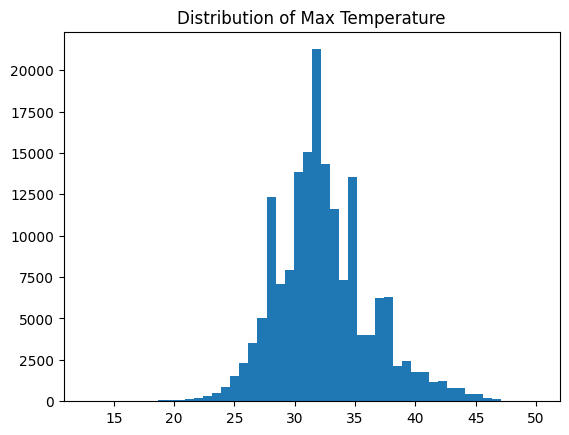

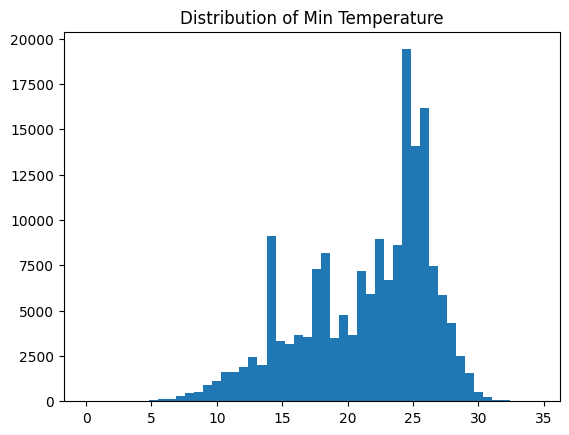

In [ ]:
# After imputation
plt.figure()
plt.hist(long_df['MaxTemp'], bins=50)
plt.title('Distribution of Max Temperature')
plt.show()

plt.figure()
plt.hist(long_df['MinTemp'], bins=50)
plt.title('Distribution of Min Temperature')
plt.show()

In [ ]:
# List of months in your dataset
months = ['Jan','Feb','Mar','April','May','Jun','July','Aug','Sep','Oct','Nov','Dec']

# Convert Max temperatures to long format
max_df = df.melt(
    id_vars=['Station Index', 'Year', 'Days'],
    value_vars=[f'{m} Max' for m in months],
    var_name='Month',
    value_name='MaxTemp'
)

# Convert Min temperatures to long format
min_df = df.melt(
    id_vars=['Station Index', 'Year', 'Days'],
    value_vars=[f'{m} Min' for m in months],
    var_name='Month',
    value_name='MinTemp'
)

# Clean month names
max_df['Month'] = max_df['Month'].str.replace(' Max','')
min_df['Month'] = min_df['Month'].str.replace(' Min','')

# Merge Max & Min
long_df = pd.merge(
    max_df,
    min_df,
    on=['Station Index','Year','Days','Month']
)

long_df.head()


,Station Index,Year,Days,Month,MaxTemp,MinTemp
0,Puri,1990,1,Jan,27.5,20.1
1,Puri,1990,2,Jan,27.0,17.8
2,Puri,1990,3,Jan,26.7,17.3
3,Puri,1990,4,Jan,26.8,16.2
4,Puri,1990,5,Jan,27.2,15.0


In [ ]:
long_df['MaxTemp'] = long_df.groupby('Month')['MaxTemp'].transform(
    lambda x: x.fillna(x.mean())
)

long_df['MinTemp'] = long_df.groupby('Month')['MinTemp'].transform(
    lambda x: x.fillna(x.mean())
)


In [ ]:
long_df = long_df.sort_values(['Year','Month','Days'])

long_df['MaxTemp'] = long_df['MaxTemp'].interpolate()
long_df['MinTemp'] = long_df['MinTemp'].interpolate()


In [ ]:
long_df.isna().sum()


,0
Station Index,0
Year,0
Days,0
Month,0
MaxTemp,0
MinTemp,0


In [ ]:
yearly_df = (
    long_df
    .groupby(['Station Index', 'Year'])
    .agg(
        Yearly_MaxTemp=('MaxTemp', 'max'),
        Yearly_MinTemp=('MinTemp', 'min')
    )
    .reset_index()
)

yearly_df.head()

,Station Index,Year,Yearly_MaxTemp,Yearly_MinTemp
0,Angul,1990,37.535061,13.99515
1,Angul,1991,37.535061,13.99515
2,Angul,1992,37.535061,13.99515
3,Angul,1993,37.535061,13.99515
4,Angul,1994,44.500000,10.00000


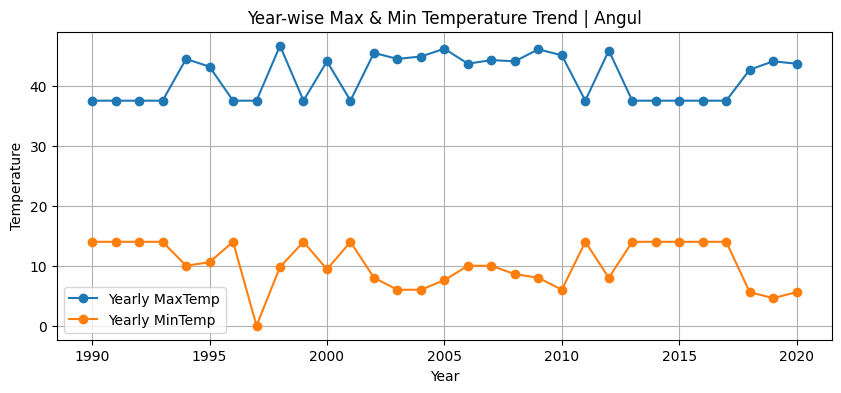

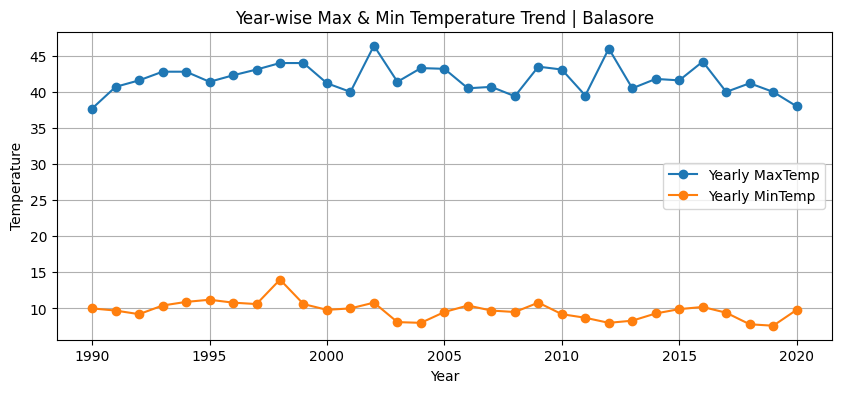

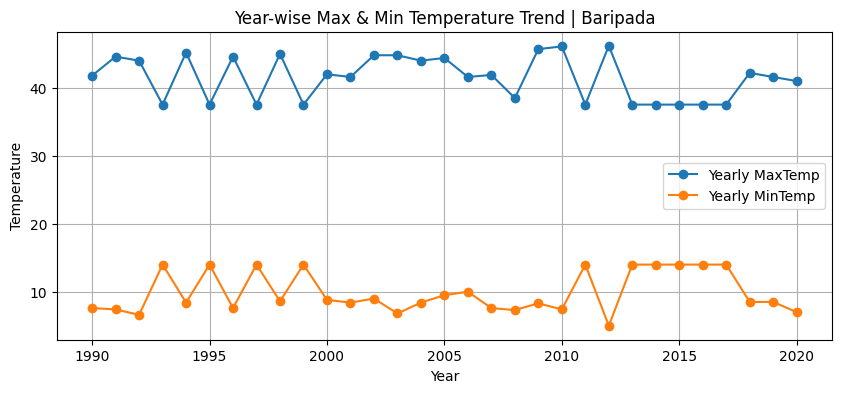

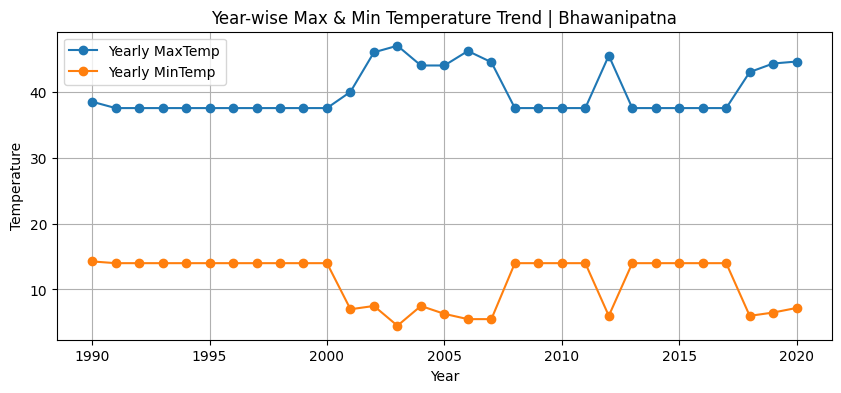

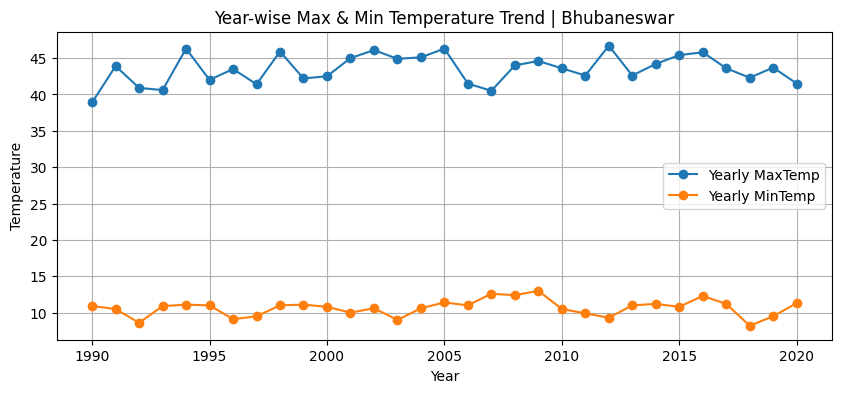

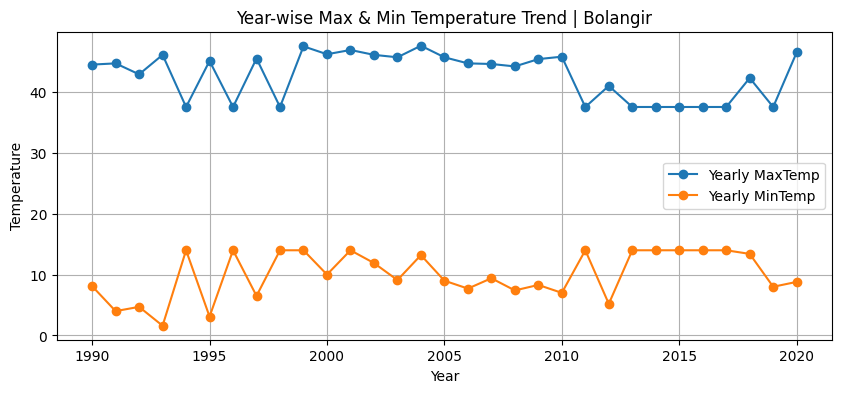

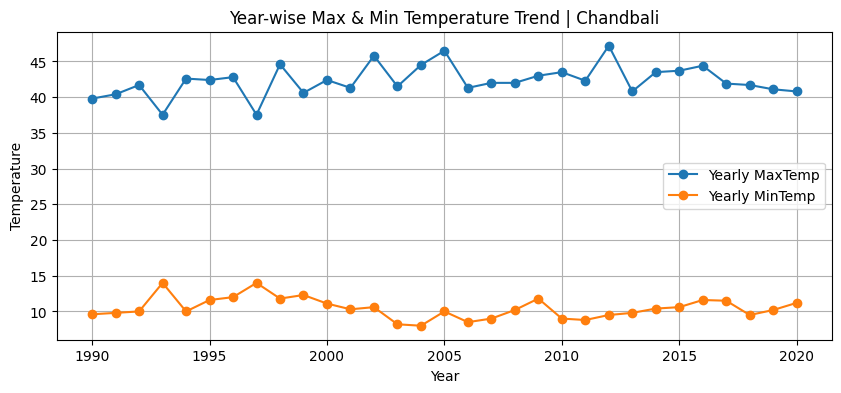

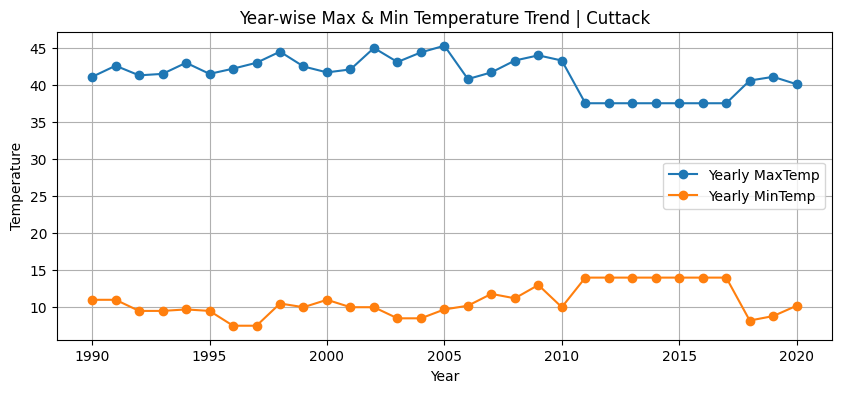

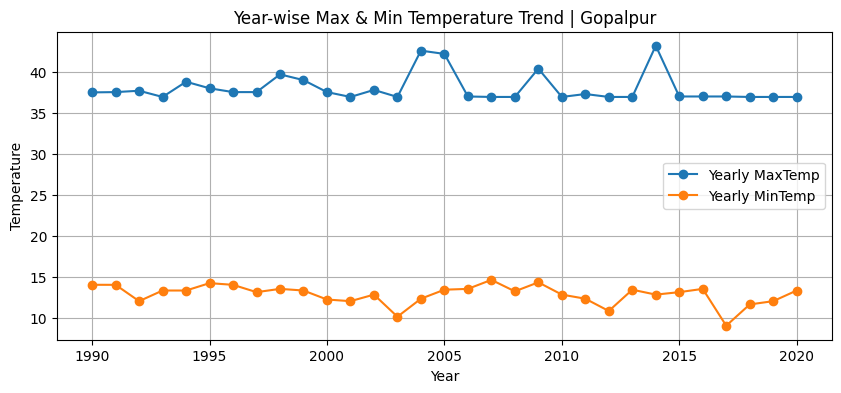

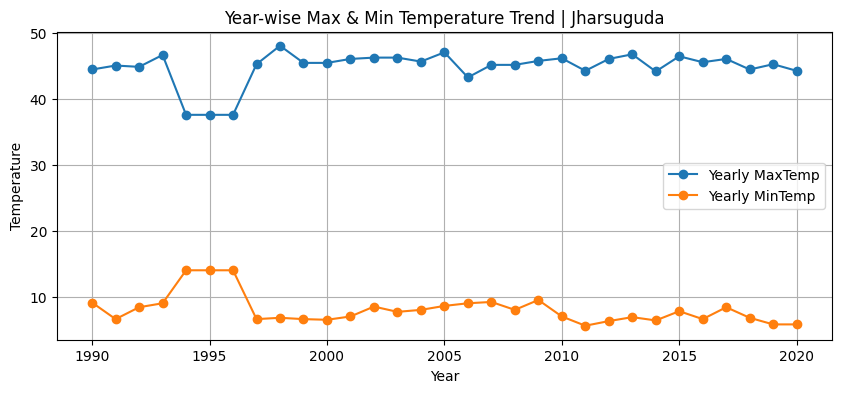

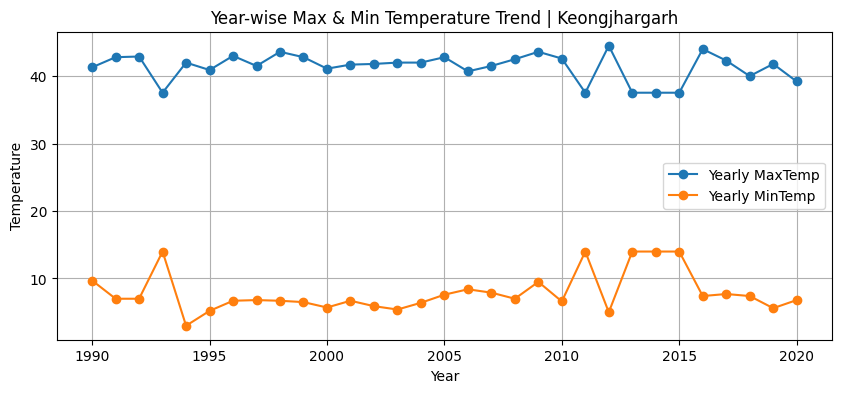

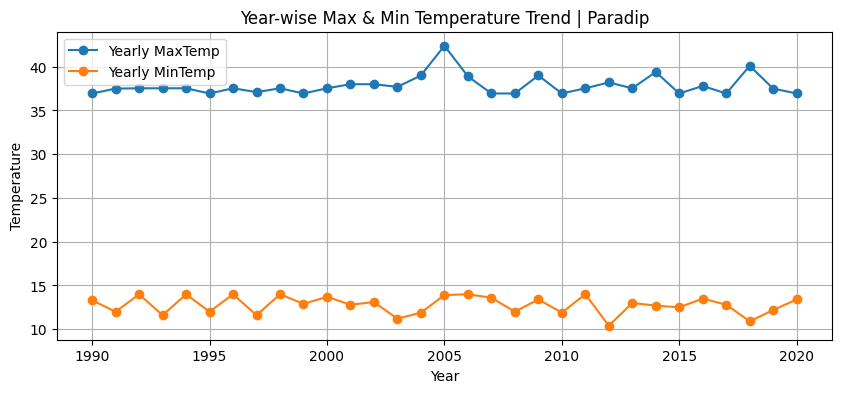

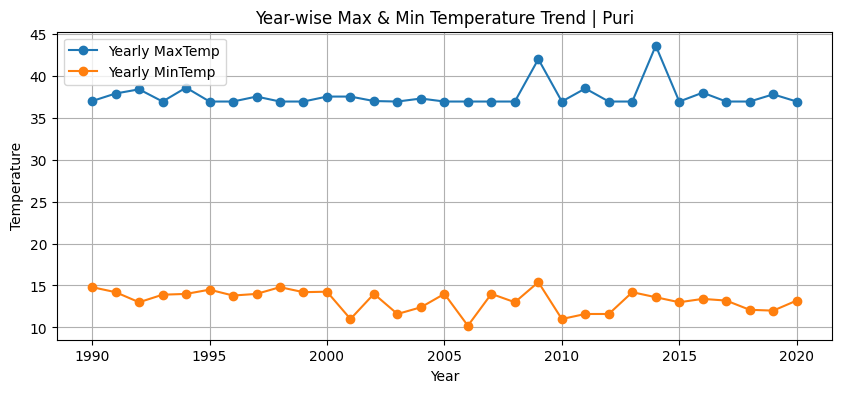

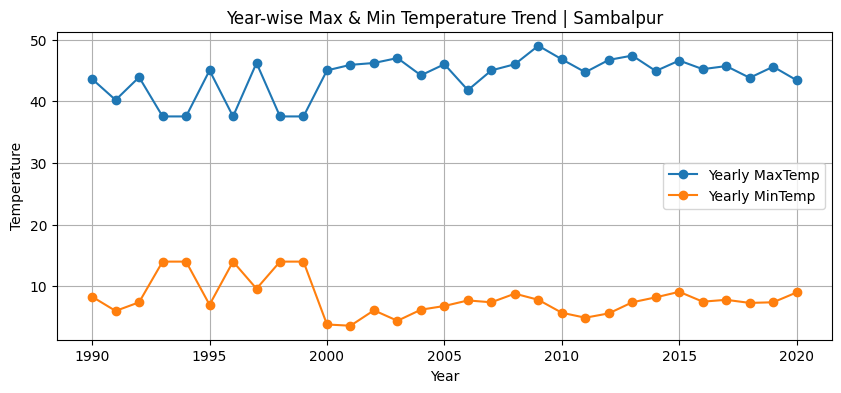

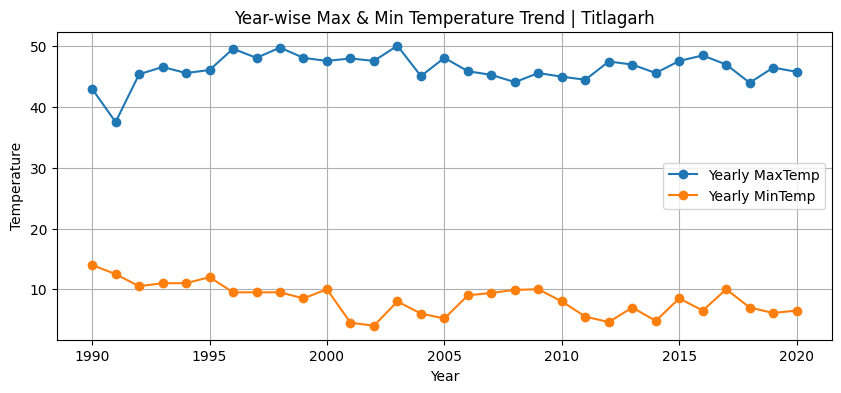

In [ ]:
import matplotlib.pyplot as plt

cities = yearly_df['Station Index'].unique()

for city in cities:
    city_year_df = yearly_df[yearly_df['Station Index'] == city]

    plt.figure(figsize=(10,4))

    plt.plot(
        city_year_df['Year'],
        city_year_df['Yearly_MaxTemp'],
        marker='o',
        label='Yearly MaxTemp'
    )

    plt.plot(
        city_year_df['Year'],
        city_year_df['Yearly_MinTemp'],
        marker='o',
        label='Yearly MinTemp'
    )

    plt.title(f'Year-wise Max & Min Temperature Trend | {city}')
    plt.xlabel('Year')
    plt.ylabel('Temperature')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
long_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172980 entries, 0 to 172979
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Station Index  172980 non-null  object 
 1   Year           172980 non-null  int64  
 2   Days           172980 non-null  int64  
 3   Month          172980 non-null  object 
 4   MaxTemp        172980 non-null  float64
 5   MinTemp        172980 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 7.9+ MB


In [ ]:
long_df.shape

(172980, 6)

In [ ]:
# Month name to number mapping
month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'April': 4, 'May': 5, 'Jun': 6,
    'July': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

long_df['MonthNum'] = long_df['Month'].map(month_map)

# Create Date column
long_df['Date'] = pd.to_datetime(
    dict(year=long_df['Year'], month=long_df['MonthNum'], day=long_df['Days']),
    errors='coerce'
)

long_df = long_df.sort_values('Date').reset_index(drop=True)

long_df.head()


,Station Index,Year,Days,Month,MaxTemp,MinTemp,MonthNum,Date
0,Puri,1990,1,Jan,27.5,20.1,1,1990-01-01
1,Bhubaneswar,1990,1,Jan,29.6,17.6,1,1990-01-01
2,Bolangir,1990,1,Jan,28.3,13.6,1,1990-01-01
3,Keongjhargarh,1990,1,Jan,26.7,11.8,1,1990-01-01
4,Cuttack,1990,1,Jan,28.1,17.5,1,1990-01-01


In [ ]:
long_df = long_df.dropna(subset=['Date'])


In [ ]:
long_df['Max_lag_1'] = long_df['MaxTemp'].shift(1)
long_df['Max_lag_7'] = long_df['MaxTemp'].shift(7)

long_df['Min_lag_1'] = long_df['MinTemp'].shift(1)
long_df['Min_lag_7'] = long_df['MinTemp'].shift(7)


In [ ]:
long_df['Max_roll_7'] = long_df['MaxTemp'].rolling(7).mean()
long_df['Min_roll_7'] = long_df['MinTemp'].rolling(7).mean()


In [ ]:
long_df.dropna(inplace=True)


In [ ]:
train = long_df[long_df['Year'] <= 2019]
valid = long_df[long_df['Year'] == 2020]


In [ ]:
features = [
    'MonthNum', 'Days',
    'Max_lag_1', 'Max_lag_7', 'Max_roll_7',
    'Min_lag_1', 'Min_lag_7', 'Min_roll_7'
]

X_train = train[features]
X_valid = valid[features]

y_train_max = train['MaxTemp']
y_valid_max = valid['MaxTemp']

y_train_min = train['MinTemp']
y_valid_min = valid['MinTemp']


In [ ]:
pred_2021 = pd.DataFrame(
    future_preds,
    columns=['Pred_MaxTemp_2021', 'Pred_MinTemp_2021']
)

pred_2021.head()


,Pred_MaxTemp_2021,Pred_MinTemp_2021


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [ ]:
xgb_max = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)

xgb_min = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)

xgb_max.fit(X_train, y_train_max)
xgb_min.fit(X_train, y_train_min)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
pred_max_2020 = xgb_max.predict(X_valid)
pred_min_2020 = xgb_min.predict(X_valid)

print("MAE MaxTemp:", mean_absolute_error(y_valid_max, pred_max_2020))
print("MAE MinTemp:", mean_absolute_error(y_valid_min, pred_min_2020))

print("RMSE MaxTemp:", np.sqrt(mean_squared_error(y_valid_max, pred_max_2020)))
print("RMSE MinTemp:", np.sqrt(mean_squared_error(y_valid_min, pred_min_2020)))

print("R² MaxTemp:", r2_score(y_valid_max, pred_max_2020))
print("R² MinTemp:", r2_score(y_valid_min, pred_min_2020))

MAE MaxTemp: 1.3799635023963586
MAE MinTemp: 1.5049400207525427
RMSE MaxTemp: 1.8650995955423126
RMSE MinTemp: 1.9259566943492528
R² MaxTemp: 0.7608805993434653
R² MinTemp: 0.8515085899599714


In [ ]:
# FULL training data (1990–2020)
full_train = long_df[long_df['Year'] <= 2020]

X_full = full_train[features]
y_full_max = full_train['MaxTemp']
y_full_min = full_train['MinTemp']

In [ ]:
xgb_max.fit(X_full, y_full_max)
xgb_min.fit(X_full, y_full_min)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
last_data = long_df[long_df['Year'] == 2020].copy()
future_preds = []

for i in range(365):
    row = last_data.iloc[-1]

    X_next = pd.DataFrame([{
        'MonthNum': row['MonthNum'],
        'Days': row['Days'],
        'Max_lag_1': row['MaxTemp'],
        'Max_lag_7': last_data.iloc[-7]['MaxTemp'],
        'Max_roll_7': last_data.tail(7)['MaxTemp'].mean(),
        'Min_lag_1': row['MinTemp'],
        'Min_lag_7': last_data.iloc[-7]['MinTemp'],
        'Min_roll_7': last_data.tail(7)['MinTemp'].mean()
    }])

    max_pred = xgb_max.predict(X_next)[0]
    min_pred = xgb_min.predict(X_next)[0]

    new_row = row.copy()
    new_row['MaxTemp'] = max_pred
    new_row['MinTemp'] = min_pred
    new_row['Year'] = 2021

    last_data = pd.concat([last_data, pd.DataFrame([new_row])])
    future_preds.append([max_pred, min_pred])

In [ ]:
pred_2021 = pd.DataFrame(
    future_preds,
    columns=['Pred_MaxTemp_2021', 'Pred_MinTemp_2021']
)

pred_2021.head()

,Pred_MaxTemp_2021,Pred_MinTemp_2021
0,28.160910,14.563087
1,28.359230,14.330679
2,28.342096,14.768089
3,28.287655,14.370836
4,28.572657,14.438330


In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [ ]:
cat_max = CatBoostRegressor(
    iterations=600,
    learning_rate=0.05,
    depth=6,
    loss_function='RMSE',
    random_seed=42,
    verbose=False
)

cat_min = CatBoostRegressor(
    iterations=600,
    learning_rate=0.05,
    depth=6,
    loss_function='RMSE',
    random_seed=42,
    verbose=False
)

In [ ]:
cat_max.fit(X_train, y_train_max)
cat_min.fit(X_train, y_train_min)

In [ ]:
pred_max_2020 = cat_max.predict(X_valid)
pred_min_2020 = cat_min.predict(X_valid)

print("CATBOOST RESULTS (2020)")
print("MAE MaxTemp:", mean_absolute_error(y_valid_max, pred_max_2020))
print("MAE MinTemp:", mean_absolute_error(y_valid_min, pred_min_2020))

print("RMSE MaxTemp:", np.sqrt(mean_squared_error(y_valid_max, pred_max_2020)))
print("RMSE MinTemp:", np.sqrt(mean_squared_error(y_valid_min, pred_min_2020)))

print("R² MaxTemp:", r2_score(y_valid_max, pred_max_2020))
print("R² MinTemp:", r2_score(y_valid_min, pred_min_2020))

CATBOOST RESULTS (2020)
MAE MaxTemp: 1.374405848950558
MAE MinTemp: 1.4977127915578767
RMSE MaxTemp: 1.8532152167637925
RMSE MinTemp: 1.9170829730410577
R² MaxTemp: 0.7639182190352736
R² MinTemp: 0.8528737669135584


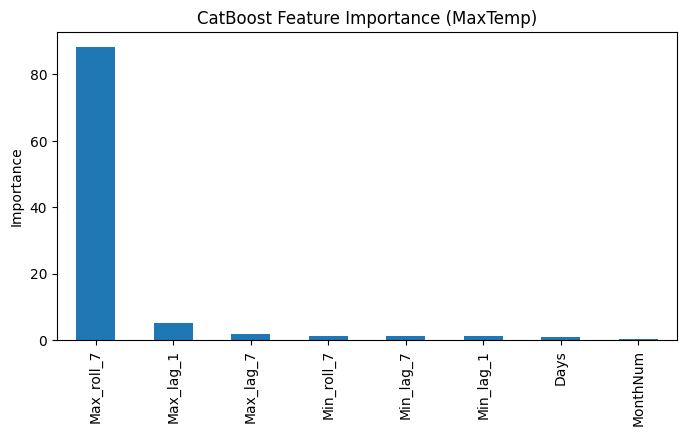

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

importance = pd.Series(
    cat_max.get_feature_importance(),
    index=features
).sort_values(ascending=False)

plt.figure(figsize=(8,4))
importance.plot(kind='bar')
plt.title('CatBoost Feature Importance (MaxTemp)')
plt.ylabel('Importance')
plt.show()

In [ ]:
full_train = long_df[long_df['Year'] <= 2020]

X_full = full_train[features]
y_full_max = full_train['MaxTemp']
y_full_min = full_train['MinTemp']

cat_max.fit(X_full, y_full_max)
cat_min.fit(X_full, y_full_min)

In [ ]:
max_pred = cat_max.predict(X_next)[0]
min_pred = cat_min.predict(X_next)[0]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
lstm_features = ['MaxTemp', 'MinTemp']

In [ ]:
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(long_df[lstm_features])

In [ ]:
def create_sequences(data, window=30):
    X, y = [], []
    for i in range(window, len(data)):
        X.append(data[i-window:i])
        y.append(data[i])
    return np.array(X), np.array(y)

WINDOW_SIZE = 30

X, y = create_sequences(scaled_data, WINDOW_SIZE)

In [ ]:
years = long_df['Year'].iloc[WINDOW_SIZE:].values

X_train = X[years <= 2019]
y_train = y[years <= 2019]

X_valid = X[years == 2020]
y_valid = y[years == 2020]

In [ ]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(WINDOW_SIZE, 2)),
    Dropout(0.2),

    LSTM(32),
    Dropout(0.2),

    Dense(2)   # MaxTemp, MinTemp
])

model.compile(
    optimizer='adam',
    loss='mse'
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=32,
    validation_data=(X_valid, y_valid),
    verbose=1
)

Epoch 1/25
5135/5135 ━━━━━━━━━━━━━━━━━━━━ 46s 8ms/step - loss: 0.0107 - val_loss: 0.0037
Epoch 2/25
5135/5135 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - loss: 0.0044 - val_loss: 0.0037
Epoch 3/25
5135/5135 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - loss: 0.0043 - val_loss: 0.0037
Epoch 4/25
5135/5135 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - loss: 0.0042 - val_loss: 0.0037
Epoch 5/25
5135/5135 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - loss: 0.0043 - val_loss: 0.0036
Epoch 6/25
5135/5135 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - loss: 0.0042 - val_loss: 0.0036
Epoch 7/25
5135/5135 ━━━━━━━━━━━━━━━━━━━━ 47s 9ms/step - loss: 0.0042 - val_loss: 0.0036
Epoch 8/25
5135/5135 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - loss: 0.0042 - val_loss: 0.0037
Epoch 9/25
5135/5135 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - loss: 0.0042 - val_loss: 0.0036
Epoch 10/25
5135/5135 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - loss: 0.0042 - val_loss: 0.0037
Epoch 11/25
5135/5135 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - loss: 0.0042 - val_loss: 0.0036
Epoch 12/25
5135/51

In [ ]:
pred_scaled = model.predict(X_valid)

pred = scaler.inverse_transform(pred_scaled)
actual = scaler.inverse_transform(y_valid)

print("MAE MaxTemp:", mean_absolute_error(actual[:,0], pred[:,0]))
print("MAE MinTemp:", mean_absolute_error(actual[:,1], pred[:,1]))

print("RMSE MaxTemp:", np.sqrt(mean_squared_error(actual[:,0], pred[:,0])))
print("RMSE MinTemp:", np.sqrt(mean_squared_error(actual[:,1], pred[:,1])))

print("R² MaxTemp:", r2_score(actual[:,0], pred[:,0]))
print("R² MinTemp:", r2_score(actual[:,1], pred[:,1]))

172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
MAE MaxTemp: 1.632475086915962
MAE MinTemp: 1.732055258319328
RMSE MaxTemp: 2.1409541198314144
RMSE MinTemp: 2.241340009008704
R² MaxTemp: 0.6849166322202036
R² MinTemp: 0.798894576491955


In [ ]:
last_seq = scaled_data[-WINDOW_SIZE:].reshape(1, WINDOW_SIZE, 2)

future_preds = []

for i in range(365):
    next_pred = model.predict(last_seq)[0]
    future_preds.append(next_pred)

    last_seq = np.roll(last_seq, -1, axis=1)
    last_seq[0, -1, :] = next_pred

future_preds = scaler.inverse_transform(future_preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━